# Waze app: user churn analysis and prediction model
Part 2: data visualization

In [1]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset into a dataframe
df = pd.read_csv("waze_dataset.csv")

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# generate summary statistics
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In order to better understand and explain the data, the following data visualization types will be used:  

*   **Box plots** to determine outliers and understand where the bulk of the data points reside in terms of continuous numerical variables (e.g. *drives* and *sessions*)
*   **Histograms** to understand the distribution of variables
*   **Scatter plots** to visualize relationships between variables
*   **Bar charts** to visualize levels and quantities, especially for categorical variables

We start by visualizing the spread and distribution of the *sessions* and *drives* variables using box plots and histograms.









**sessions**: *the number of occurrences of a user opening the app during the month*

Text(0.5, 1.0, 'Monthly sessions per user')

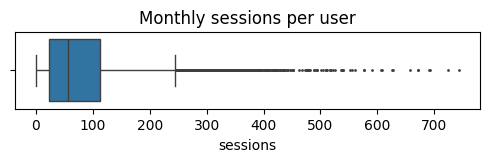

In [6]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["sessions"], fliersize=1) # fliersize indicates the size of the markers for outlier observations
plt.title("Monthly sessions per user")

Text(0.5, 1.0, 'Monthly sessions per user')

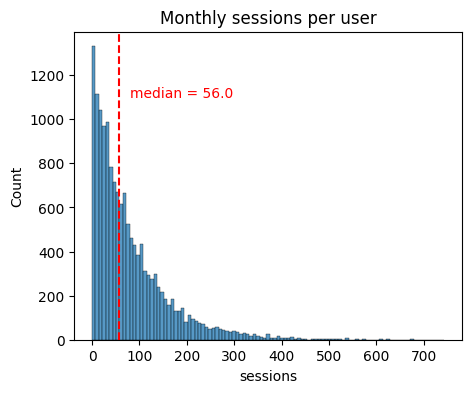

In [7]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["sessions"])
median = df["sessions"].median()
plt.axvline(median, color="red", linestyle="--")
plt.text(80,1100, "median = 56.0", color="red")
plt.title("Monthly sessions per user")

As displayed above, the sessions variable is right-skewed. Half of the observations represent 56 or
fewer user sessions per month.

**drives**: *an occurrence of driving at least 1 km during the month*

Text(0.5, 1.0, 'Drives (of at least 1km) per month')

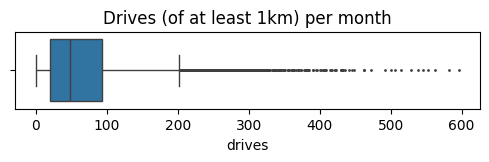

In [8]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["drives"], fliersize=1)
plt.title("Drives (of at least 1km) per month")

To simplify the process of plotting the same type of histograms for several variables, the following function has been used:

In [9]:
def histogrammer(column_name, median_text=True, **kwargs):
  # **kwargs allow you to pass multiple keyword arguments to the function
  median=round(df[column_name].median(), 1)
  plt.figure(figsize=(5,3))
  ax = sns.histplot(x=df[column_name], **kwargs)
  plt.axvline(median, color="red", linestyle="--") # plot median line
  if median_text==True:  # add median text
    ax.text(0.20, 0.85, f'median={median}', color="red", ha="left", va="top", transform=ax.transAxes)
  else:
    print("Median:", median)
  plt.title(f'{column_name} histogram')

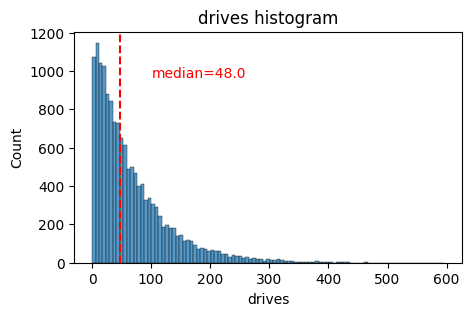

In [10]:
histogrammer("drives")

Similarly to the *sessions* distribution, the *drives* distribution is also right-skewed and has a median of 48 drives (of at least 1km) per user during the last month.

**total_sessions**: *estimate of the total number of sessions since a user has onboarded*

Text(0.5, 1.0, 'total_sessions')

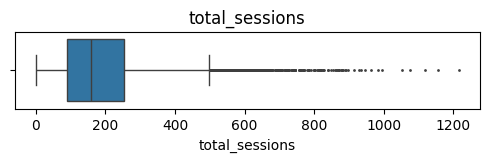

In [11]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["total_sessions"], fliersize=1)
plt.title("total_sessions")

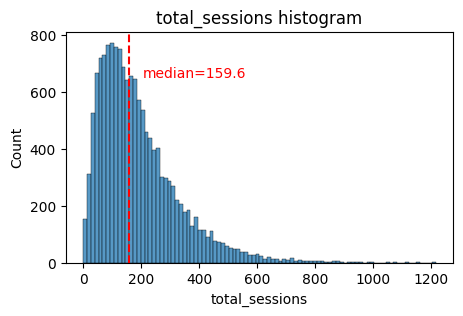

In [12]:
histogrammer("total_sessions")

The *total sessions* distribution is also right-skewed, with a median of 159.6.  

**n_days_after_onboarding**: *number of days since a user signed up for the Waze app*

Text(0.5, 1.0, 'n_days_after_onboarding')

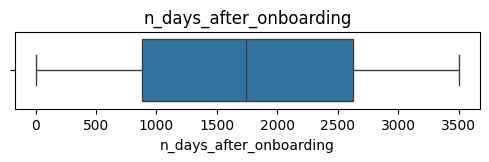

In [13]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["n_days_after_onboarding"], fliersize=1)
plt.title("n_days_after_onboarding")

Median: 1741.0


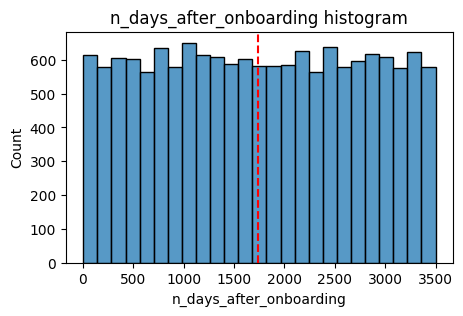

In [14]:
histogrammer("n_days_after_onboarding", median_text=False)

The "n_days_after_onboarding" variable shows a uniform distribution.

**driven_km_drives**: *total kilometers driven during the month*

Text(0.5, 1.0, 'driven_km_drives')

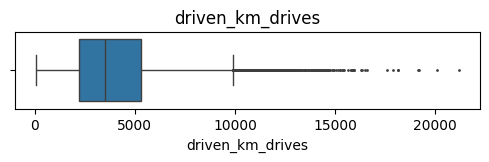

In [15]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["driven_km_drives"], fliersize=1)
plt.title("driven_km_drives")

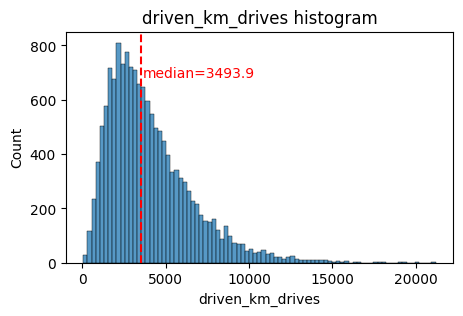

In [16]:
histogrammer("driven_km_drives")

The graphs show another right-skewed distribution, with a median of 3,495 kilometers driven per user in the last month.

**duration_minutes_drives**: *total minutes driven during last month*

Text(0.5, 1.0, 'duration_minutes_drives')

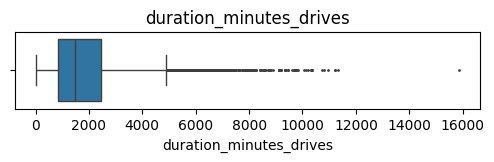

In [17]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["duration_minutes_drives"], fliersize=1)
plt.title("duration_minutes_drives")

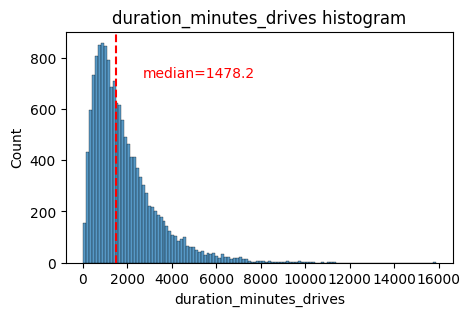

In [18]:
histogrammer("duration_minutes_drives")

The *duration_minutes_drives* variable has a median of 1478 minutes, indicating that half of the users drove less than 25 hours in the last month.

**activity_days**: *number of days the user opened the app during the month*

Text(0.5, 1.0, 'activity_days')

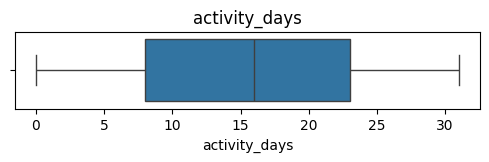

In [19]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["activity_days"], fliersize=1)
plt.title("activity_days")

Median: 16.0


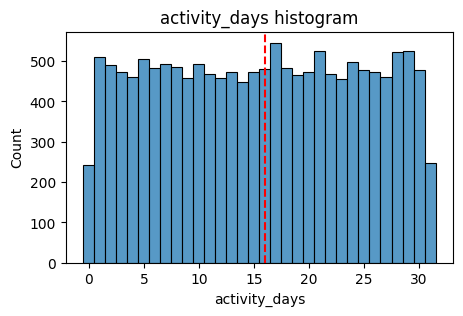

In [20]:
histogrammer("activity_days", median_text=False, discrete=True)

The *activity_days* variable shows a centered distribution, with ~250 users who never opened the app during the month and ~250 users who opened the app every day.

**driving_days**: *number of days the user drives (at least 1 km) during the month*

Text(0.5, 1.0, 'driving_days')

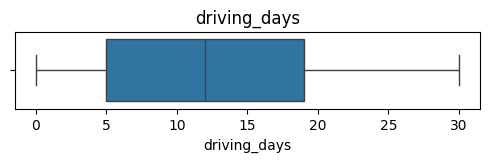

In [21]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["driving_days"], fliersize=1)
plt.title("driving_days")

Median: 12.0


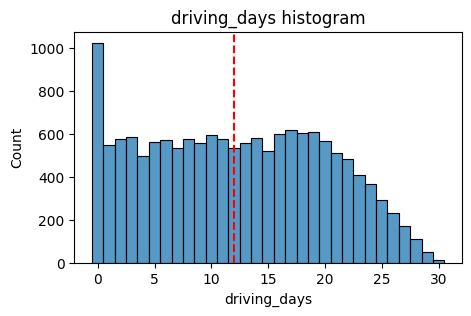

In [22]:
histogrammer("driving_days", median_text=False, discrete=True)

The *driving_days* variable shows a quite uniform distribuion, tailing off on the right. However, it also shows that ~1,000 users did not drive at all during the whole month.

**device**: *type of device a user starts a session with*

Since this is a categorical variable, a pie chart will be used:

In [48]:
data = df["device"].value_counts()
data

iPhone     9672
Android    5327
Name: device, dtype: int64

Text(0.5, 1.0, 'Users by device')

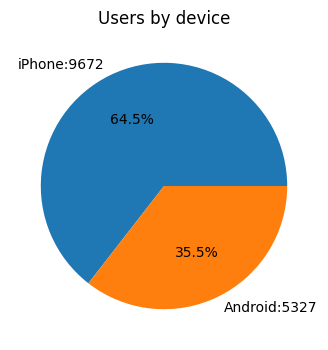

In [51]:
fig = plt.figure(figsize=(4,4))
plt.pie(data,
        # format the labels as "device : value_counts"
        labels=[f'{data.index[0]}:{data.values[0]}',
        f'{data.index[1]}:{data.values[1]}'],
        # add the percentage:
        autopct='%1.1f%%'
        )

plt.title("Users by device")

**label**: *binary target variable (“retained” vs “churned”) for if a user has churned anytime during
the course of the month*

In [52]:
data = df["label"].value_counts()
data

retained    11763
churned      2536
Name: label, dtype: int64

Text(0.5, 1.0, 'Count of retained vs churned users')

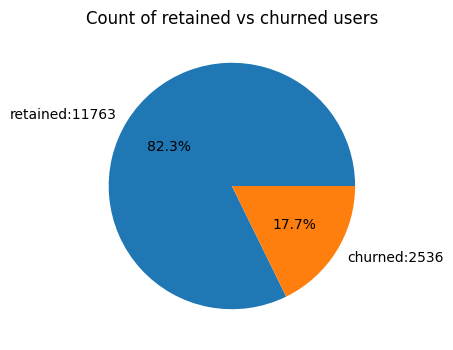

In [53]:
fig = plt.figure(figsize=(4,4))
plt.pie(data,
        # format the labels as "label : value_counts"
        labels=[f'{data.index[0]}:{data.values[0]}',
        f'{data.index[1]}:{data.values[1]}'],
        # add the percentage:
        autopct='%1.1f%%'
        )

plt.title("Count of retained vs churned users")
